<a href="https://colab.research.google.com/github/danielma4/motion_detection/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imutils

In [ ]:
import cv2
import numpy
import matplotlib.pyplot as plt
import time
import imutils

#loading and preprocessing the images
def preprocess_image(image_path):
  image = cv2.imread(image_path)
  image = cv2.resize(image(1280,720))
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image, gray_image
def subtract_images(original_image, copy_image):
  diff = cv2.absdiff(original_image,copy_image)
  tresh = cv2.threshold(diff,0,1,cv2.THRESH_BINARY)
  return diff, tresh
image_path1 = "advbgst_2_0002.jpg"
image_path2 = "advbgst_2_0002.jpg"

original_image, gray_image1= preprocess_image(image_path1)
copy_image, gray_image2 = preprocess_image(image_path2)

#subtract the image
diff, thresh = subtract_images(gray_image1,gray_image2)

#plotting images
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.title("Difference")
plt.imshow(diff, camp='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Treshold')
plt.imshow(tresh)
plt.axis('off')

plt.show()



TypeError: 'numpy.ndarray' object is not callable

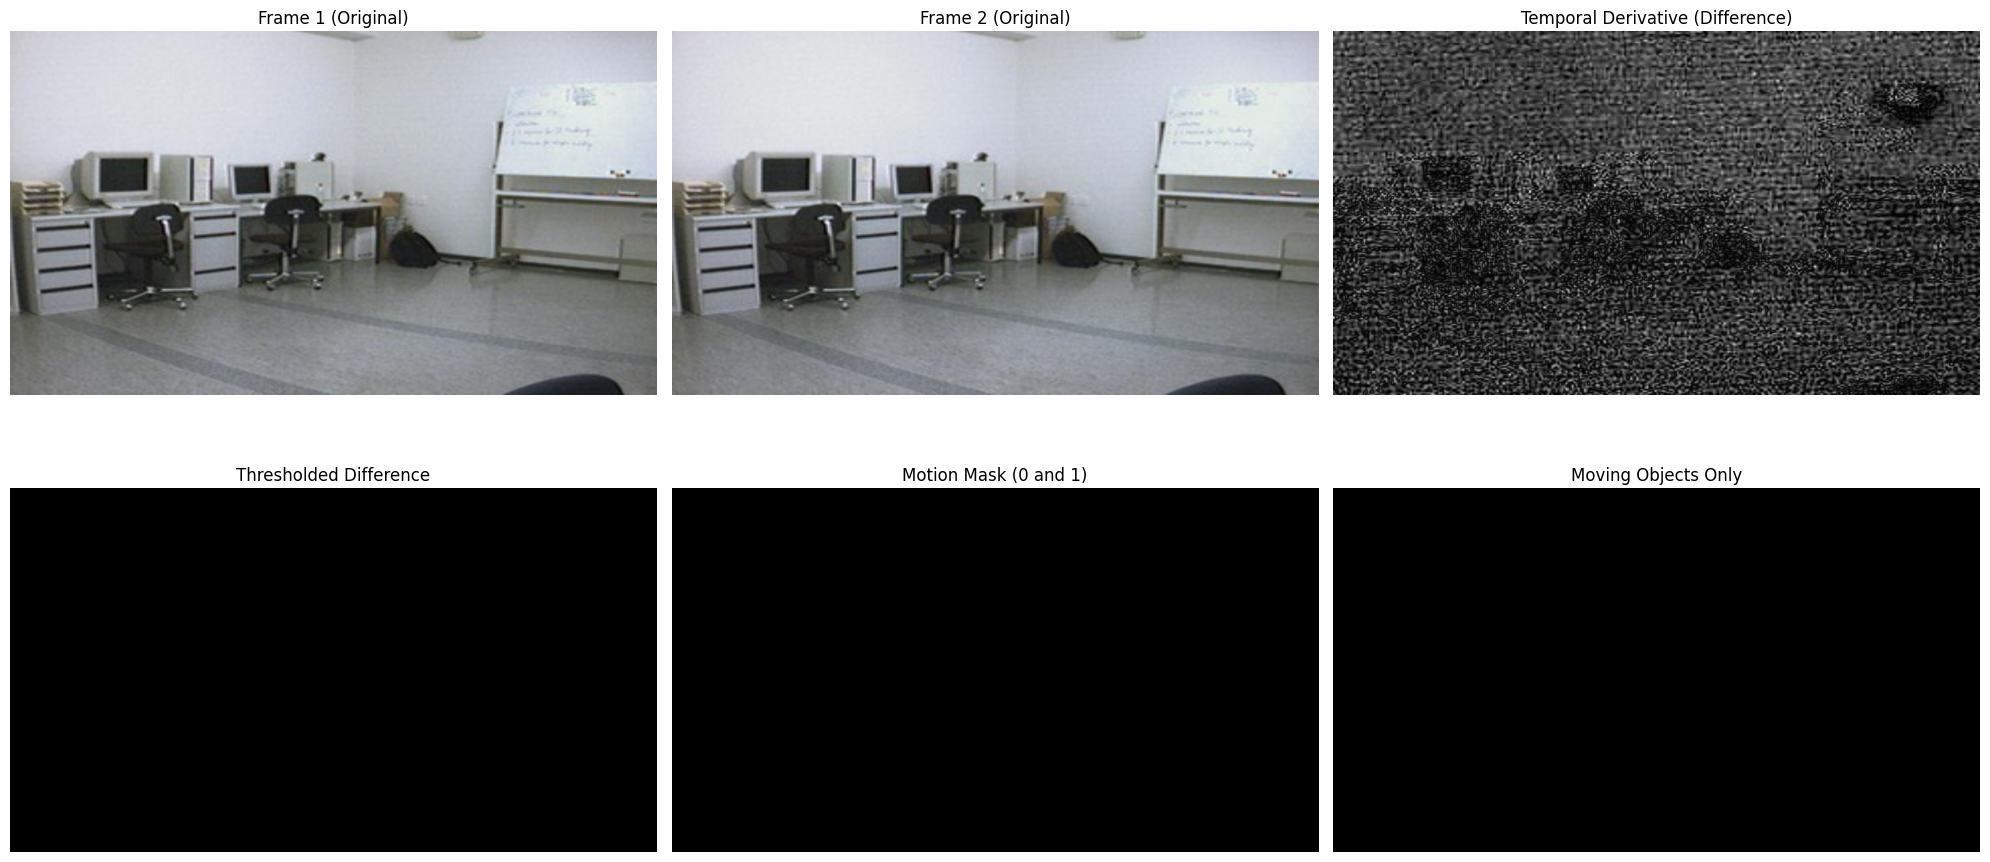

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading and preprocessing the images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (1280, 720))  # Fixed: square brackets
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image

def compute_temporal_derivative(frame1, frame2):
    """
    Compute temporal derivative between consecutive frames
    This is essentially the frame difference (1-D differential operator)
    """
    # Compute absolute difference (temporal derivative)
    diff = cv2.absdiff(frame1, frame2)
    return diff

def create_motion_mask(diff, threshold_value=30):
    """
    Threshold the temporal derivative to create binary mask
    """
    # Apply threshold to create binary mask (0 and 1)
    _, thresh = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    # Convert to 0 and 1 mask
    mask = (thresh > 0).astype(np.uint8)

    return thresh, mask

def apply_mask_to_frame(original_frame, mask):
    """
    Combine mask with original frame to highlight moving objects
    """
    # Convert mask to 3 channels to match original image
    mask_3channel = cv2.cvtColor(mask * 255, cv2.COLOR_GRAY2BGR)

    # Apply mask to original frame
    masked_frame = cv2.bitwise_and(original_frame, mask_3channel)

    return masked_frame

# Example with two different images (you should use consecutive frames)
image_path1 = "/content/drive/MyDrive/RedChair/RedChair/advbgst1_21_0005.jpg"
image_path2 = "/content/drive/MyDrive/RedChair/RedChair/advbgst1_21_0006.jpg"  # Changed to different frame

# Process images
original_image1, gray_image1 = preprocess_image(image_path1)
original_image2, gray_image2 = preprocess_image(image_path2)

# Step 2: Compute temporal derivative
temporal_derivative = compute_temporal_derivative(gray_image1, gray_image2)

# Step 3: Create motion mask
thresh, motion_mask = create_motion_mask(temporal_derivative, threshold_value=30)

# Step 4: Apply mask to original frame
result = apply_mask_to_frame(original_image2, motion_mask)

# Plotting results
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title("Frame 1 (Original)")
plt.imshow(cv2.cvtColor(original_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Frame 2 (Original)")
plt.imshow(cv2.cvtColor(original_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Temporal Derivative (Difference)")
plt.imshow(temporal_derivative, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Thresholded Difference')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Motion Mask (0 and 1)')
plt.imshow(motion_mask, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Moving Objects Only')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:

import os
import sys

def convert_to_grayscale(input_path, output_path):
    # Validate file existence
    if not os.path.isfile(input_path):
        print(f"Error: File '{input_path}' not found.")
        return False

    # Read the image
    image = cv2.imread(input_path)
    if image is None:
        print(f"Error: Unable to read '{input_path}'. Ensure it's a valid image file.")
        return False

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Save the grayscale image
    cv2.imwrite(output_path, gray_image)
    print(f"Grayscale image saved as '{output_path}'")
    return True

if __name__ == "__main__":
    # Example usage: python script.py input.jpg output.jpg
    if len(sys.argv) != 3:
        print("Usage: python script.py <input_image> <output_image>")
        sys.exit(1)

    input_file = sys.argv[1]
    output_file = sys.argv[2]

    convert_to_grayscale(input_file, output_file)


Error: File '-f' not found.


In [ ]:
import cv2
vid = cv2.VideoCapture("C:\\Users\\Admin\\PycharmProjects\\project_1\\openCV.mp4")

count, success = 0, True
while success:
    success, image = vid.read() # Read frame
    if success:
        cv2.imwrite(f"frame{count}.jpg", image) # Save frame
        count += 1

vid.release()